<a href="https://colab.research.google.com/github/singlahimani786/Parametric_Optimization_102217156/blob/main/Parametric_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


--- SVM Optimization Results (Table 1) ---
  Sample  Best Accuracy  Best C Value
0     S1          71.00         5.088
1     S2          71.93         8.521
2     S3          68.13         6.334
3     S4          69.87         1.265
4     S5          69.47         5.761


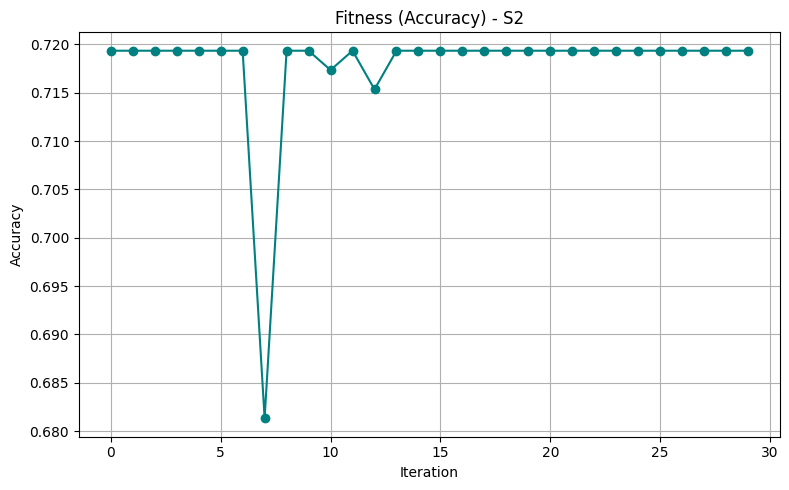

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Step 1: Load 5,000 rows from UCI dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data"
columns = ['letter', 'x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar',
           'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx']
df = pd.read_csv(url, header=None, names=columns)
df = df.sample(n=5000, random_state=42).reset_index(drop=True)

# Step 2: Encode target labels (A-Z to 0–25)
le = LabelEncoder()
df['letter'] = le.fit_transform(df['letter'])

# Step 3: Split X and y, then scale
X = df.drop('letter', axis=1)
y = df['letter']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Prepare seeds for 5 samples
random_seeds = random.sample(range(1000), 5)
results = []
convergence_logs = {}

# Step 5: Loop through samples and optimize
for i, seed in enumerate(random_seeds):
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=seed)
    best_acc = 0
    convergence = []

    for itr in range(30):  # Reduced from 100 to 30
        clf = LinearSVC(C=np.random.uniform(0.01, 10), max_iter=1000)
        try:
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            acc = accuracy_score(y_test, y_pred)
            convergence.append(acc)

            if acc > best_acc:
                best_acc = acc
                best_C = clf.C
        except Exception as e:
            continue

    results.append({
        'Sample': f'S{i+1}',
        'Best Accuracy': round(best_acc * 100, 2),
        'Best C Value': round(best_C, 3)
    })
    convergence_logs[f'S{i+1}'] = convergence

# Step 6: Print Result Table (Table 1)
result_df = pd.DataFrame(results)
print("\n--- SVM Optimization Results (Table 1) ---")
print(result_df)

# Step 7: Plot convergence for best sample
best_sample_index = result_df['Best Accuracy'].idxmax()
best_sample_id = result_df.loc[best_sample_index, 'Sample']
best_convergence = convergence_logs[best_sample_id]

plt.figure(figsize=(8, 5))
plt.plot(best_convergence, marker='o', color='teal')
plt.title(f"Fitness (Accuracy) - {best_sample_id}")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.savefig("convergence_plot.png")  # Save for README
plt.show()
